# 추가한 패키지
* from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
* from sklearn.preprocessing import PolynomialFeatures

* from sklearn.model_selection import GridSearchCV

* import mglearn


* import warnings
* warnings.simplefilter('ignore')

In [1]:
!pip install mglearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

규제 변수 알파가 커지게되면 weight가
규제를 가해주면 w가?  0에 가까이 가게 됨.

릿지회귀, l1, l2
0에 가깝게 가는데 l1은 아예 0으로 만들어서 ...
릿지나 라쏘는 모델을 통해서 테스트 해보고 
앙상블을 통해서 해당 데이터의 적합한 모델을 선택할 수 있음.
라쏘회귀.
둘다 적용하는게 엘라스틱넷. 람다를 이용해서 어느쪽이 비중이 높은지를 볼 수 있고 
특성데이터가 많은 경우에 예측값이 좋을수 있따.
다항회귀는 차수를 높혀서 측정값을 높이는데 과적합이 일어날 수 있음. 예측곡선을 그리는데 정확도는 높게나오지만 트레이닝데이터셋에 적합하도록 예측곡선을 만들기 떄문에 테스트셋에서 값이 낮게 나올 수 있다. 갭이 크기 떄문에

# [설명]릿지 회귀(Ridge Regression) L2규제

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
* α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  * p:특성의갯수


In [3]:
boston = load_boston()

In [4]:
boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)


In [7]:
model_ridge = make_pipeline(StandardScaler(), Ridge())
model_ridge.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [8]:
display(model_ridge.score(x_train,y_train))
display(model_ridge.score(x_test,y_test))

0.729336032904444

0.763403805803235

In [9]:
# ridge에 규제를 더 가해보자
model_ridge5 = make_pipeline(StandardScaler(), Ridge(alpha=5.0))
model_ridge5.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5.0))])

In [10]:
display(model_ridge5.score(x_train,y_train))
display(model_ridge5.score(x_test,y_test))

0.7289067264142004

0.7629020804027657

## 라쏘 회귀(Lasso Regression) L1규제
​
​
* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
​
* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
​
\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}
​
* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능
* p: 독립변수의 갯수


In [11]:
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_lasso.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [12]:
display(model_lasso.score(x_train,y_train))
display(model_lasso.score(x_test,y_test))

0.6510370822546789

0.6546512972478653

In [13]:
# 규제를 좀 더 주자
model_lasso5 = make_pipeline(StandardScaler(), Lasso(alpha=5.0))
model_lasso5.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=5.0))])

In [14]:
display(model_lasso5.score(x_train,y_train))
display(model_lasso5.score(x_test,y_test))

0.2411098676402389

0.20844368630060406

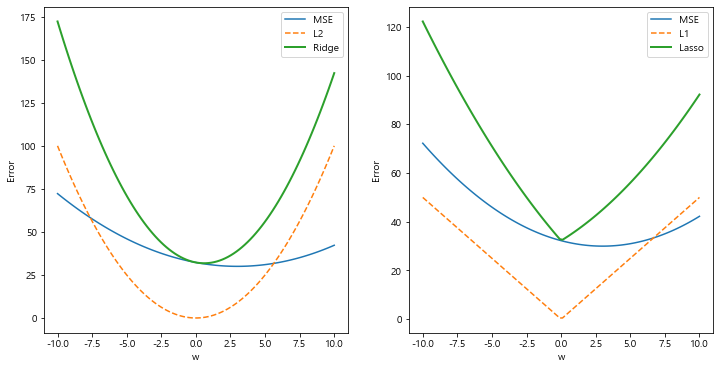

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = ( 0.5*(rng-3) )**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()


In [16]:
# Pipeline은 
modelLasso = Pipeline([('scl',StandardScaler()), ('clf',Lasso())])
# param_value = {'clf__alpha':[0.001,0.01,1,2,3,4], 'scl__with_mean':[True,False]}
param_value = {'clf__alpha':[0.001,0.01,1,2,3,4]}
gridSearch = GridSearchCV(modelLasso, param_grid=param_value, cv =10,verbose=1, scoring='r2')
gridSearch.fit(x_train,y_train)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', Lasso())]),
             param_grid={'clf__alpha': [0.001, 0.01, 1, 2, 3, 4]}, scoring='r2',
             verbose=1)

In [17]:
# 최고 점수
gridSearch.best_score_

0.6779423483447162

In [18]:
# 최적의 파라미터
gridSearch.best_params_

{'clf__alpha': 0.01}

In [19]:
# 테스트를 어떻게 진행했는지 목록을 보여줌
gridSearch.cv_results_

{'mean_fit_time': array([0.004142  , 0.00669494, 0.00258181, 0.00376406, 0.00371485,
        0.00351996]),
 'std_fit_time': array([0.00117962, 0.01140702, 0.00044486, 0.00100432, 0.00047736,
        0.00049469]),
 'mean_score_time': array([0.00149572, 0.00100653, 0.00110009, 0.00144162, 0.00147293,
        0.00159705]),
 'std_score_time': array([4.98892130e-04, 2.01801435e-05, 2.98508924e-04, 5.64553721e-04,
        4.80706661e-04, 4.86875178e-04]),
 'param_clf__alpha': masked_array(data=[0.001, 0.01, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__alpha': 0.001},
  {'clf__alpha': 0.01},
  {'clf__alpha': 1},
  {'clf__alpha': 2},
  {'clf__alpha': 3},
  {'clf__alpha': 4}],
 'split0_test_score': array([0.86741933, 0.8674495 , 0.74379226, 0.63721411, 0.49084771,
        0.3494708 ]),
 'split1_test_score': array([0.53857014, 0.53985541, 0.56511277, 0.53008636, 0.44409762,
        0.35941902]),

In [20]:
# 최적의 모델
gridSearch.best_estimator_

Pipeline(steps=[('scl', StandardScaler()), ('clf', Lasso(alpha=0.01))])

In [21]:
# 그 최적의 모델로 예측
gridSearch.best_estimator_.predict(x_test)

array([32.47490159, 28.12987635, 17.99758874, 21.59467646, 18.78113215,
       19.9054232 , 32.24548395, 18.10731193, 24.28355458, 27.07276872,
       26.91811443, 28.84699137, 21.25821228, 26.78436789, 23.35425277,
       20.55737907, 17.31818837, 38.20107276, 30.49008317,  8.86690023,
       20.8036567 , 16.38064481, 25.21265174, 24.89868344, 31.33266735,
       10.7419558 , 13.88204311, 16.89019083, 36.48926363, 14.60805028,
       21.33716851, 13.96614295, 42.93446218, 17.9737495 , 22.0898439 ,
       20.714934  , 17.59898767, 27.30050043,  9.37526708, 19.74832155,
       24.6039903 , 21.25145519, 29.49189492, 16.24904175, 19.22623771,
       14.6501572 , 39.1377036 , 18.06654423, 25.84809473, 20.44186795,
       25.11177946, 24.39847463, 25.12406209, 26.58879586,  4.82750881,
       24.00969384, 10.90593883, 26.89589097, 16.92873279, 35.8638718 ,
       19.53784819, 27.53852396, 16.52302842, 18.71106844, 11.21959849,
       32.33423855, 36.70207163, 22.33109429, 24.50027637, 25.06

# [설명] 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수


* L1에 좀 더 볼 건지 L2에 좀 더 초점을 둘 건지 보는것 

In [22]:
model_elastic = make_pipeline(StandardScaler(), ElasticNet())
model_elastic.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [23]:
print(model_elastic.score(x_train,y_train))
print(model_elastic.score(x_test,y_test))

0.635207359597604
0.6285547370483677



# 연습문제
- alpha=1.0, l1_ratio=0.5
- gridSearch를 이용하여 최적의 alpha와 l1 ratio를 구하시오.

In [24]:
modelElastic = Pipeline([('scl', StandardScaler()), ('clf',ElasticNet()),])
param_value = {'clf__alpha': [0.001, 0.01, 1, 2, 3, 4],
              'clf__l1_ratio' : [0.1, 0.5, 1]}
gridSearch = GridSearchCV(modelElastic, param_grid = param_value, cv = 10, verbose = 1, scoring = 'r2')
gridSearch.fit(x_train, y_train)
gridSearch.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


{'clf__alpha': 0.01, 'clf__l1_ratio': 1}

In [25]:
gridSearch.best_score_

0.6779423483447162

# [결론] 각 모델의 특성만 잘 알것
* 릿지나 라쏘나 엘라스틱을 쓰는 이유는 멀티픽쳐(특성데이터 여러개)
* 릿지 라쏘 엘라스틱은 다중공선성에 대해 규제를 가하기 때문에 웨이트 값을 조절, 웨이트 가중치를 주지않도록 
* 웨이트가 0이라면 아예 계산에서 빠져버리는 것. (w1x1 + w2x2 + w3x3 ....) => 칼럼을 제거하는 것과 똑같은 효과.
* 보통 0으로 주는 경우는 l1규제인 경우, l2같은 경우는 0에 근접한 값이 나옴.
* 엘라스틱은 파라미터가 특성데이터 개수가 상당히 많은 경우 효과를 볼 수 있따.
* l1,l2규제 모두 들어가고 어디에 강조를 할 것인지 l1.ratio를 통해 줄 수 있따.
* 앙상블도 배울건데, 하나의 데이터가 주어지면 모델을 조합해서 쓸 수 있어야 함.
* 이게 핵심임. -> gridsearch 최적 파라미터 찾고 앙상블을 통해 최적 모델을 찾는 것. 모델 각각의미를 알아내는 건 지금부터하고
* 추정데이터 예측분석 하는 중임.
* classification도 l1, l2 또 나옴.

# [설명]다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

$ * 차수(차수 2는 2번곱함 x^2, 차수3은 3번곱합 x^3)가  $<br>
높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


In [26]:
# 과적합이 일어나기 쉬움. 데이터를 이용해서 다항회귀를 하게되면 여기에 근접하게 트레이닝을 함. 제곱하기떄문에 곡선이 나오는데 
# 추가되는데이터에 대해선 정확도가 떨어지게 됨. 다항회귀는 잘못하면 과적합이 일어나기 쉬운 리그레션임.
# 리그레션모델에 차수를 더해주는 것이라고 생각.


In [27]:
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),LinearRegression() )
model.fit(x_train, y_train)
# 곡선형태로 나오게 됨. 

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [28]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test)) # 현저히 낮게 나오면 과적합

0.9264046957163291
0.9116244055634332


# [정리]
* 선형회귀 : linearegressor
* 경사하강법 : wb구하는것
* 릿지 : l2
* 랏쏘 : l1
* 엘라스틱넷 : ㅣ1,ㅣ2 다중공선성 높은 곳에 규제를 둬서 웨이트를 낮게?
* 다항회귀 : 기존 회귀선을 곡선으로 실데이터에 맞게끔 곡선으로 만듦. 
* 차분을 줘서 다항회귀로 변형가능
* 그리드서치를 통해 확인가능
* 잘못하면 과적합이 날 수 있기에 실제 적합한 예측곡선을 가지고 테스트 쪽에도 그대로 적용되는지 확인


## 분류화
문자열 인코딩(문자열된 걸 학습하려면 수치화해야함.)
분류 쪽에서는 a,b,c학점 처럼 문자를 수치화 = 인코딩 하는 법
classification하는 방법을 배울 것임.